In [75]:
# Import Necessary Libraries
import pandas as pd
import numpy as np

# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Domain Knowlegde

1. **work_year [categorical]**: The year the salary was paid.
2. **experience_level [categorical]**: The experience level in the job during the year.
3. **employement_type [categorical]**: The type of employment for the role.
4. **job_title [categorical]**: The role worked in during the year.
5. **salary [numerical]**: The total gross salary amount paid.
6. **salary_currency [categorical]**: The currency of the salary paid as an ISO 4217 currency code.
7. **salaryinud [numerical]**: The salary in USD.
8. **employee_residence [categorical]**: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. **remote_ratio [ratio]**: The overall amount of work done remotely.
10. **company_location [categorical]**: The country of the employee's main office or contracting branch.
11. **company_size [categorical]**: The median number of people that worked for the company during the year as an ISO 3166 country code.


In [76]:
data = pd.read_csv('ds_salaries.csv')

In [77]:
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


# 1. Exploratory Data Analysis (EDA)

# 1.1 Check Null Values

In [78]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# 1.2 Check Duplicate Data

In [79]:
duplicate_rows_data= data[data.duplicated()]
print("number of duplicate rows", duplicate_rows_data.shape)

number of duplicate rows (1171, 11)


In [81]:
# drop duplicated data
data = data.drop_duplicates()

In [82]:
data.shape

(2584, 11)

# 1.3 Check Unique Value in Each Column

In [83]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [85]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [86]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [87]:
for column in data.columns:
  if data[column].dtypes == object:

    num_distinct_values = data[column].nunique()
    distinct_values = data[column].unique()

    print(f"{column}: {num_distinct_values} -> {distinct_values}\n")

experience_level: 4 -> ['SE' 'MI' 'EN' 'EX']

employment_type: 4 -> ['FT' 'CT' 'FL' 'PT']

job_title: 93 -> ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scienti

# 1.4 Rename the Value for better understanding

In [90]:
data['experience_level'] = data['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry Level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level'
})

data['employee_type'] = data['employment_type'].replace({
    'FL':'Freelancer',
    'CT':'Contractor',
    'FT':'Full-time',
    'PT':'Part-time'
})

data['remote_ratio'] = data['remote_ratio'].replace({
    0:'On-Site',
    50:'Half-Remote',
    100:'Full-Remote'
})

In [91]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_type
0,2023,Senior,FT,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L,Full-time
1,2023,Mid/Intermediate level,CT,ML Engineer,30000,USD,30000,US,Full-Remote,US,S,Contractor
2,2023,Mid/Intermediate level,CT,ML Engineer,25500,USD,25500,US,Full-Remote,US,S,Contractor
3,2023,Senior,FT,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M,Full-time
4,2023,Senior,FT,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M,Full-time


# 1.5 Group the Job Title

In [92]:
print(data['job_title'].nunique())
data['job_title'].unique()

93


array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [93]:
def assign_broder_category(job_title):
  data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
  data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
  machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
  data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
  management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]

  if job_title in data_engineering:
    return "Data Engineering"
  elif job_title in data_scientist:
    return "Data Scientist"
  elif job_title in machine_learning:
    return "Machine Learning"
  elif job_title in data_architecture:
    return "Data Architecture"
  elif job_title in management:
    return "Management"
  else:
    return "Other"

data.loc[:,"job_category"] = data["job_title"].apply(assign_broder_category)

# 1.6 Adjust Salary to Present Value

**Dealing with Inflation rate**

In [95]:
# Inflation rates
us_inflation_rates = {2019: 0.0181,
                      2020: 0.0123,
                      2021: 0.0470,
                      2022: 0.065}
global_inflation_rates = {2019: 0.0219,
                          2020: 0.0192,
                          2021: 0.0350,
                          2022: 0.088}

# Function to adjust salary
def adjust_salary(row):
    year = row['work_year']
    original_salary = row['salary_in_usd']
    currency = row['salary_currency']

    if year == 2023:
        return original_salary
    else:
        adjusted_salary = original_salary

        for y in range(year, 2023):
            if currency == 'USD':
                inflation_rate = us_inflation_rates[y]
            else:
                inflation_rate = global_inflation_rates[y]

            adjusted_salary = adjusted_salary * (1 + inflation_rate)

        return adjusted_salary

In [97]:
data['adjusted_salary'] = data.apply(adjust_salary, axis=1)

In [98]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_type,job_category,adjusted_salary
0,2023,Senior,FT,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L,Full-time,Other,85847.000000
1,2023,Mid/Intermediate level,CT,ML Engineer,30000,USD,30000,US,Full-Remote,US,S,Contractor,Machine Learning,30000.000000
2,2023,Mid/Intermediate level,CT,ML Engineer,25500,USD,25500,US,Full-Remote,US,S,Contractor,Machine Learning,25500.000000
3,2023,Senior,FT,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M,Full-time,Data Scientist,175000.000000
4,2023,Senior,FT,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M,Full-time,Data Scientist,120000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,FT,Data Scientist,412000,USD,412000,US,Full-Remote,US,L,Full-time,Data Scientist,465053.312718
3751,2021,Mid/Intermediate level,FT,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L,Full-time,Other,168373.305000
3752,2020,Entry Level,FT,Data Scientist,105000,USD,105000,US,Full-Remote,US,S,Full-time,Data Scientist,118520.868532
3753,2020,Entry Level,CT,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L,Contractor,Data Engineering,112877.017650


# 1.7 Job Distribution

In [99]:
value_counts = data['job_category'].value_counts(normalize=True) * 100
value_counts

job_category
Data Engineering     44.156347
Data Scientist       24.729102
Other                15.402477
Machine Learning      9.442724
Management            3.637771
Data Architecture     2.631579
Name: proportion, dtype: float64

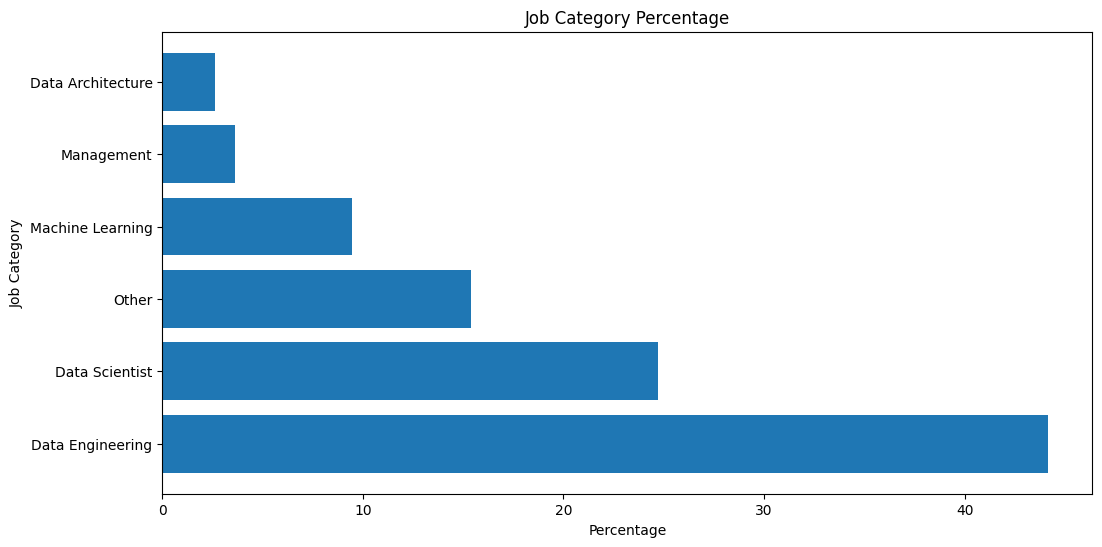

In [100]:
fig, ax = plt.subplots(figsize=(12,6))

ax.barh(value_counts.index, value_counts.values)
ax.set_title('Job Category Percentage')
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')

plt.show()

# 1.8 Distribution across different employment types

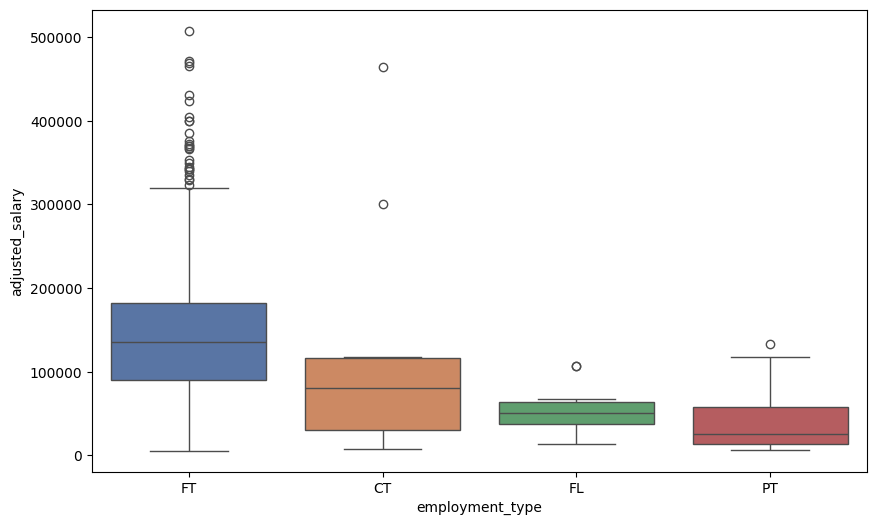

In [163]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='employment_type', y='adjusted_salary', hue='employment_type', palette='deep')

plt.show()

# 1.9 Distribution of Salary

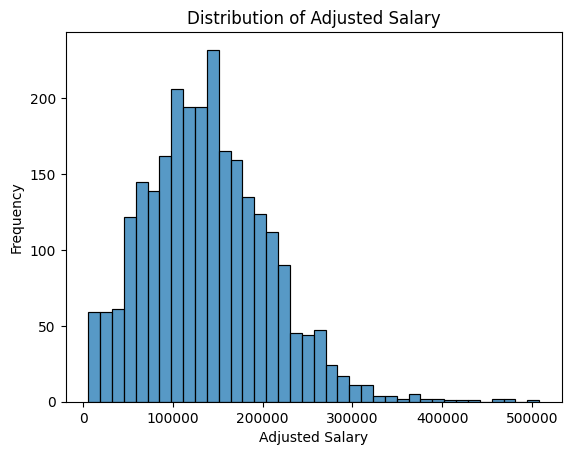

In [165]:
sns.histplot(data['adjusted_salary'])

plt.title('Distribution of Adjusted Salary')
plt.ylabel('Frequency')
plt.xlabel('Adjusted Salary')

plt.show()

# 1.10 Boxplot and Swarmplot of Adjusted Salary

<ipython-input-187-c157f73ddc05>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['adjusted_salary'], palette='coolwarm')


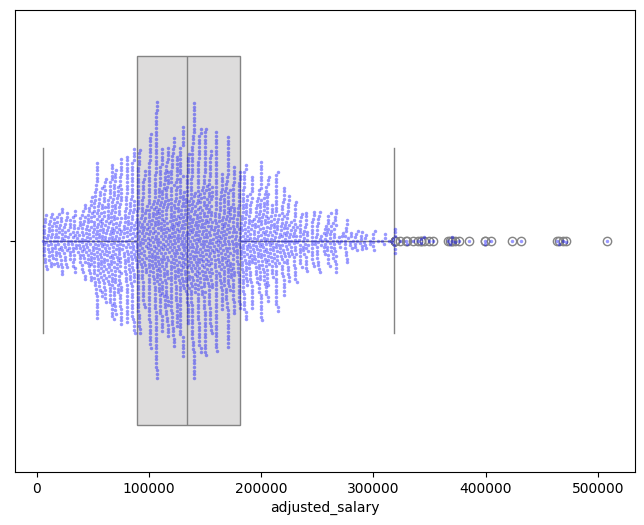

In [187]:
plt.figure(figsize=(8,6))

sns.boxplot(x=data['adjusted_salary'], palette='coolwarm')
sns.swarmplot(x=data['adjusted_salary'], color='blue', alpha = 0.4 ,size = 2.5)

plt.show()

In [175]:
data['adjusted_salary'].describe()

count      2584.000000
mean     138560.259727
std       69092.951905
min        5583.616000
25%       89460.000000
50%      134318.173494
75%      181050.000000
max      507946.579425
Name: adjusted_salary, dtype: float64

# 2. Answer These Questions

* Show the **median** adjusted data scientist salary, for each experience level

In [188]:
data_scientist_salaries = data[data['job_category'] == 'Data Scientist']

median_salaries_by_experience = data_scientist_salaries.groupby('experience_level')['adjusted_salary'].median()

print(median_salaries_by_experience)

experience_level
Entry Level                82715.648
Executive level           169335.000
Mid/Intermediate level     95850.000
Senior                    162722.500
Name: adjusted_salary, dtype: float64


* Show the number of the records for each company_location, sorted desending

In [189]:
data['company_location'].value_counts().sort_values(ascending=False)

company_location
US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
NZ       1
CL       1
MD       1
EG       1
MT       1
Name: count, Length: 72, dtype: int64

* From this data, show median adjusted salary of employee who works for company located in Indonesia (ID), do you think that value represent the salary in Indonesia? why? why not?

In [197]:
ID_DS = data[(data['company_location'] == 'ID') & (data['job_category'] == 'Data Scientist')]
Median = ID_DS['adjusted_salary'].median()
Median

58116.60800000001

In [196]:
ID_DS

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_type,job_category,adjusted_salary
3061,2022,Mid/Intermediate level,FT,Data Scientist,4200000,INR,53416,IN,Full-Remote,ID,L,Full-time,Data Scientist,58116.608


Based on the obtained median value, it does **not represent** the salary of a Data Scientist in Indonesia because the result is not statistically valid. The median value is derived from only one data point, which is insufficient to draw any meaningful conclusions about the entire population of Data Scientist salaries in Indonesia. For an accurate representation, a more substantial and diverse dataset would be needed to account for the various factors that contribute to salary differences in Indonesia.